In [88]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand

In [135]:
def DeltaRule_Training_Batch(rx, class_q1, eta, iterations):
    rows = len(rx)
    columns = len(rx[0])
    row_class = len(class_q1)
    print(row_class)
    rand_w = np.random.rand(1,columns + 1)
    delta_w = np.array(rand_w).T
    out_q1 = []
    err = []
    e = []
    if rows != row_class:
        print('Number of data points are not equal to the number target Class')
    else:
        for j in range(iterations):
            w = delta_w
            for i in range(rows):
                # D = sum( w .* [rx(i, :), 1]); % delta rule
                if w[0][0] + rx[i][0] * w[1][0] + rx[i][1] * w[2][0] < 0:
                    out_q1.append(-1)
                else:
                    out_q1.append(1)

                delta = class_q1[i] - out_q1[i]
                delta_w[0][0] = delta_w[0][0] + eta * delta
                delta_w[1][0] = delta_w[1][0] + rx[i][0] * delta
                delta_w[2][0] = delta_w[2][0] + rx[i][1] * delta
                # delta_w(i,1)=eta*(class_q1(i)-out_q1(i)).*[rx(i,:),1];
                err.append(0.5 * pow(class_q1[i] - out_q1[i], 2))
            e.append(sum(err) / rows)
    print(len(out_q1))        
    return w, out_q1, e

In [150]:
def plotE(e, iterations):
    plt.figure(figsize=(15, 4))
    plt.title('Error Function E', fontdict={'fontweight': 'bold', 'fontsize': 18})
    plt.plot(np.arange(0, iterations, 1), e, label='Error Function E')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Error')
    plt.show()

In [108]:
for i in range(100):
    for j in range(2):
        x[i][j] = random.randint(-10, 10)
x

array([[ -9.,  -7.],
       [  5.,   8.],
       [ -9.,   5.],
       [  2.,  -1.],
       [ -8.,   4.],
       [  1.,   0.],
       [ -6.,   4.],
       [  2.,  -5.],
       [  7.,  -5.],
       [ -8.,  -3.],
       [  5.,  -6.],
       [  5.,  -5.],
       [ -7.,   5.],
       [ -5.,  -5.],
       [  9.,   4.],
       [  6.,  -9.],
       [ -4.,   2.],
       [ -1.,   3.],
       [ -9.,   1.],
       [  5.,   3.],
       [ -9.,   0.],
       [  4.,  -6.],
       [  7.,  -3.],
       [  3., -10.],
       [ -8.,  -2.],
       [  6., -10.],
       [ -6.,   8.],
       [  0.,   1.],
       [ -3.,   9.],
       [ -9.,  -4.],
       [  3.,  10.],
       [  9., -10.],
       [  1.,   6.],
       [ -8.,   2.],
       [ -8.,   7.],
       [ -2.,  -1.],
       [  0.,  -9.],
       [  3.,  10.],
       [ -5.,  -8.],
       [  8.,   0.],
       [ -5.,  -8.],
       [ 10.,   8.],
       [  0.,   1.],
       [ -8.,   9.],
       [ -7.,   0.],
       [ -8.,   9.],
       [-10.,  -8.],
       [ -4.,

In [109]:
class_train = [0] * 100
for i in range(100):
    if x[i][0] + 2 * x[i][1] - 2 > 0:
        class_train[i] = 1
    else:
        class_train[i] = -1   

In [110]:
class_train

[-1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1]

In [117]:
class_q1 = np.array(class_train).T

In [118]:
class_q1

array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
        1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
        1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1])

In [119]:
eta = 0.1
iterations = 100
w, out_q1, e = DeltaRule_Training_Batch(x, class_q1, eta, iterations)
# plot_2D(rx, out_q1, 'g', 'r')
#plot_2D(x, class_q1, 'red', 'green')

100


In [146]:
def plot_2D(rx,class_q1, color1, color2):
    #print(len(rx))    
    posindex =[]
    negindex = []
    for i in range(len(class_q1)):
        if class_q1[i]==1:
            posindex.append(i)
        else:
            negindex.append(i)
    print(posindex)
    print(len(negindex))
    plt.figure(figsize=(15, 4))
    plt.title('Classwise Scatter', fontdict={'fontweight': 'bold', 'fontsize': 18})
    plt.scatter(rx[posindex==0],rx[posindex==1], color='b', label='Class 1')
    #plt.scatter(rx[negindex],rx[negindex], color='r', label='Class -1')
    plt.legend()
    plt.show()

[1, 3, 4, 5, 7, 8, 9, 12, 14, 16, 17, 19, 22, 26, 27, 28, 30, 32, 33, 37, 39, 41, 42, 43, 45, 51, 52, 53, 55, 57, 58, 59, 60, 61, 65, 69, 70, 71, 74, 75, 78, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 96, 98, 101, 103, 105, 108, 112, 114, 117, 119, 122, 126, 127, 128, 130, 132, 137, 139, 141, 142, 143, 145, 151, 152, 155, 157, 158, 159, 160, 161, 165, 169, 170, 171, 174, 175, 178, 182, 183, 184, 185, 186, 187, 188, 191, 192, 193, 196, 198, 201, 203, 205, 208, 214, 217, 219, 222, 226, 227, 228, 230, 232, 237, 239, 241, 242, 243, 245, 251, 252, 255, 257, 258, 260, 261, 265, 269, 270, 271, 274, 275, 278, 282, 284, 285, 286, 287, 288, 291, 292, 293, 296, 298, 301, 303, 305, 308, 314, 317, 319, 322, 326, 327, 328, 330, 332, 337, 339, 341, 342, 343, 345, 351, 352, 355, 357, 358, 360, 361, 365, 369, 370, 371, 374, 375, 378, 382, 384, 385, 386, 387, 388, 391, 392, 393, 396, 398, 401, 403, 405, 408, 414, 417, 419, 422, 426, 427, 428, 430, 432, 437, 439, 441, 442, 443, 445, 452, 455, 457, 458, 460,

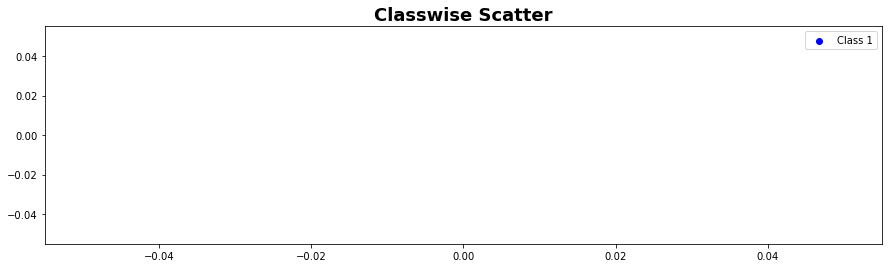

In [147]:
plot_2D(x, out_q1, 'red', 'green')

In [148]:
eta = 0.001;
#iterations = 5
iterations_5 = 5 ;
w, out_q1_5, e = DeltaRule_Training_Batch(x, class_q1, eta, iterations_5);
len(out_q1_5)

100
500


500

100
500
[1, 3, 4, 5, 7, 8, 9, 12, 14, 16, 17, 19, 22, 26, 27, 28, 30, 32, 33, 37, 39, 41, 42, 43, 45, 51, 52, 53, 55, 57, 58, 59, 60, 61, 64, 65, 66, 69, 70, 71, 74, 75, 78, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 96, 98, 101, 103, 104, 105, 112, 114, 117, 119, 122, 126, 127, 128, 130, 132, 134, 137, 139, 141, 142, 143, 145, 151, 152, 155, 157, 158, 159, 160, 161, 165, 169, 170, 171, 174, 175, 178, 182, 183, 184, 185, 186, 187, 188, 191, 192, 193, 196, 198, 201, 203, 205, 212, 214, 217, 219, 222, 226, 227, 228, 230, 232, 234, 237, 239, 241, 242, 243, 245, 251, 252, 255, 257, 258, 260, 261, 265, 269, 270, 271, 274, 275, 278, 282, 283, 284, 285, 286, 287, 288, 291, 292, 293, 296, 298, 301, 303, 305, 312, 314, 317, 319, 322, 326, 327, 328, 330, 332, 334, 337, 339, 341, 342, 343, 345, 351, 352, 355, 357, 358, 360, 361, 365, 369, 370, 371, 374, 375, 378, 382, 383, 384, 385, 386, 387, 388, 391, 392, 393, 396, 398, 401, 403, 405, 412, 414, 417, 419, 422, 426, 427, 428, 430, 432, 434, 437, 439

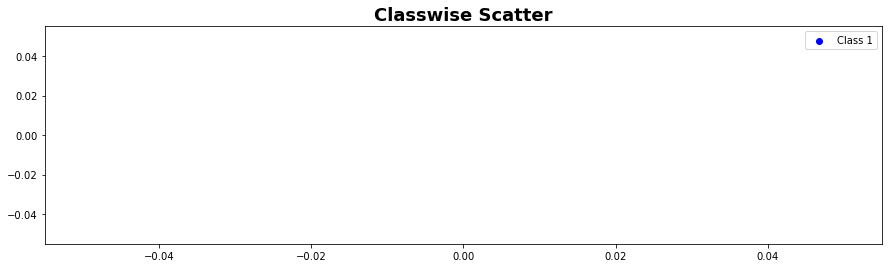

In [152]:
print(len(x))
print(len(out_q1_5))
plot_2D(x, out_q1_5, 'g', 'r')

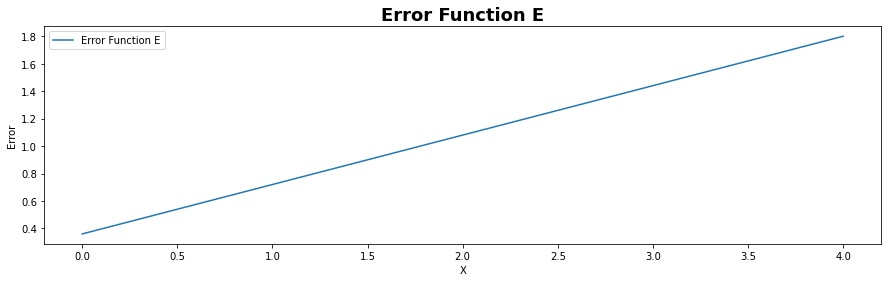

In [151]:
plotE(e,iterations_5)